# 1. Perkenalan Dataset

Dataset yang digunakan: Breast Cancer Wisconsin (Diagnostic)

Sumber: sklearn.datasets (UCI ML Repository)

Jumlah sampel: 569

Jumlah fitur: 30 (mean radius, mean texture, dll)

Target: 2 kelas (Malignant/Ganas, Benign/Jinak)

Tujuan: Klasifikasi medis untuk mendeteksi kanker payudara.

# 2. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')
print("Library berhasil diimport!")

Library berhasil diimport!


# 3. Memuat Dataset

In [2]:
cancer = load_breast_cancer()

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
# Mapping target: 0 = Malignant, 1 = Benign
df['class'] = df['target'].map({0: 'malignant', 1: 'benign'})

# Simpan sebagai mentah
df.to_csv('cancer_raw.csv', index=False)
print("Dataset Breast Cancer berhasil dimuat!")
print(f"Shape: {df.shape}")
df.head()

Dataset Breast Cancer berhasil dimuat!
Shape: (569, 32)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


# 4. Exploratory Data Analysis (EDA)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothn

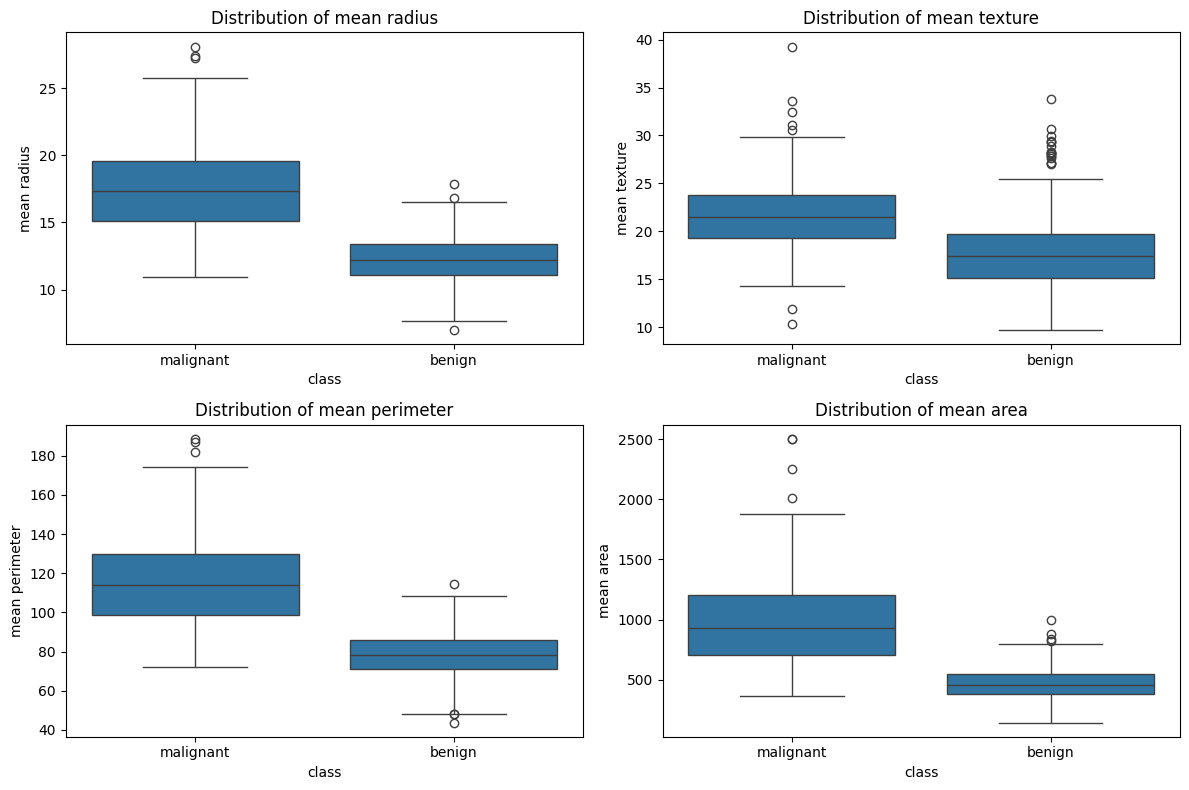

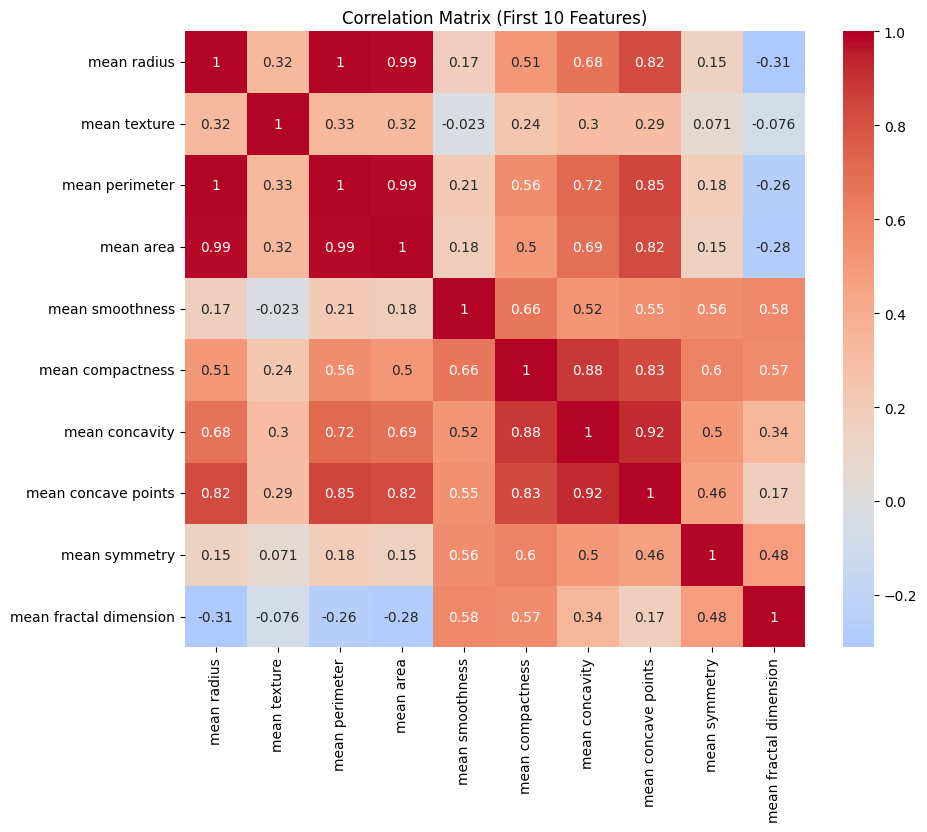

In [3]:
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif (5 kolom pertama):")
print(df.iloc[:, :5].describe())
print("\nMissing Values:")
print(df.isnull().sum().sum()) # Total missing values
print("\nDistribusi Target:")
print(df['class'].value_counts())

# Boxplot untuk 4 fitur pertama
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features_to_plot = cancer.feature_names[:4]
for idx, feature in enumerate(features_to_plot):
    ax = axes[idx//2, idx%2]
    sns.boxplot(data=df, x='class', y=feature, ax=ax)
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Heatmap Korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = df[cancer.feature_names[:10]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (First 10 Features)')
plt.show()

# 5. Data Preprocessing

In [4]:

df_clean = df.drop_duplicates()

# Pisahkan fitur dan target
X = df_clean[cancer.feature_names]
y = df_clean['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_df = pd.DataFrame(X_train_scaled, columns=cancer.feature_names)
train_df['target'] = y_train.values

train_df.to_csv('iris_preprocessing.csv', index=False)
print("Preprocessing selesai! Data siap untuk tahap Modelling.")

Preprocessing selesai! Data siap untuk tahap Modelling.
